# 2 Лабораторная работа по машинному обучению
## Выполнил студент группы 15-В-1 Суворкин Павел
## Вариант 10
## Цель лабораторной работы – получение навыков работы с методами классификации.

## mushrooms
## *классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)
## *логический классификатор (бинарное решающее дерево)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import pylab as pl

from sklearn import cross_validation, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

df = pd.read_csv('mushrooms.csv')

C:\Users\Suvor\Desktop\Рабочий стол\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Suvor\Desktop\Рабочий стол\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df.shape

(8124, 23)

In [3]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(8124, 23)

In [4]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

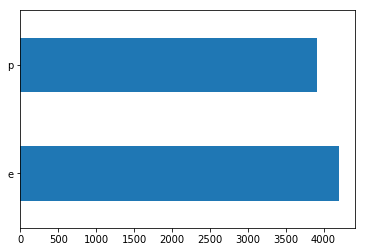

In [5]:
%matplotlib inline
df['class'].value_counts().plot.barh()
plt.show()

# roc - баланс

### 4.	Выполните масштабирование количественных признаков;

Не требуется, т.к. в данном набореданных нет количественных признаков

### 5.	Выполните замену категориальных признаков;

In [6]:
df.nunique()
df.drop('veil-type', axis = 1, inplace = True)

{0: 'f', 1: 't'}


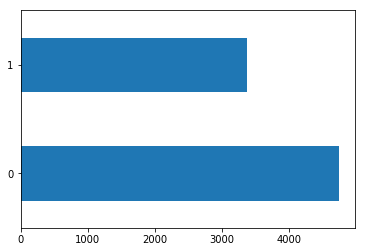

In [7]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['bruises']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [8]:
categorical_columns = df.columns[df.dtypes == 'object'].union(['bruises'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

                          cap-shape  cap-surface  cap-color   bruises  \
cap-shape                  1.000000    -0.050454  -0.048203 -0.035374   
cap-surface               -0.050454     1.000000  -0.019402  0.070228   
cap-color                 -0.048203    -0.019402   1.000000 -0.000764   
bruises                   -0.035374     0.070228  -0.000764  1.000000   
odor                      -0.021935     0.045233  -0.387121 -0.061825   
gill-attachment            0.078865    -0.034180   0.041436  0.137359   
gill-spacing               0.013196    -0.282306   0.144259 -0.299473   
gill-size                  0.054050     0.208100  -0.169464 -0.369596   
gill-color                -0.006039    -0.161017   0.084659  0.527120   
stalk-shape                0.063794    -0.014123  -0.456496  0.099364   
stalk-root                 0.030191    -0.126245   0.321274  0.244188   
stalk-surface-above-ring  -0.030417     0.089090  -0.060837  0.460824   
stalk-surface-below-ring  -0.032591     0.107965  -

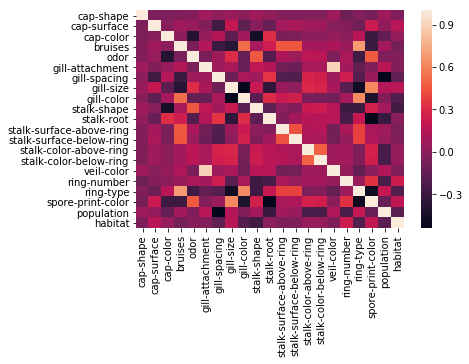

In [9]:
corr_matrix = df.drop(['class',], axis=1).corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

### 7.	Заполните пропущенные значения в данных; 

Таких значений нет

## 8.	Решите поставленную задачу классификации в соответствии с заданием. 
## *классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [10]:
df1 = df.copy()
X, Y = df.drop('class', axis=1), df['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)
print(X_train.shape)
print(X_test.shape)

rnc = RadiusNeighborsClassifier(outlier_label=1)

params = {'radius': np.arange(0, 5, 0.25)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, Y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score, '\t at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
rnc.fit(X_train, Y_train)
best_score  = np.mean(Y_test  == rnc.predict(X_test))
print('test score: ', best_score)

(5686, 21)
(2438, 21)
best train score: 0.9950756243404854 	 at radius: 3.0
test score:  0.996308449549


## *логический классификатор (бинарное решающее дерево); 

In [13]:
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,22)), 'max_features': list(range(1,22))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, Y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, Y_train)
best_score  = np.mean(Y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 1.0 	 at features number: 16 	 at depth: 7
test score:  1.0


In [17]:
class MyRadiusNeighborsClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, Y_train):
        
        runs = 25
        dr = (2*self.radius/runs)    
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(Y_test),2), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, Y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, Y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

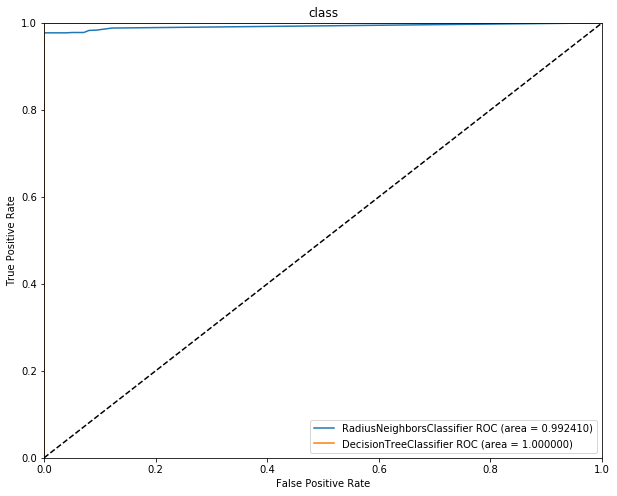

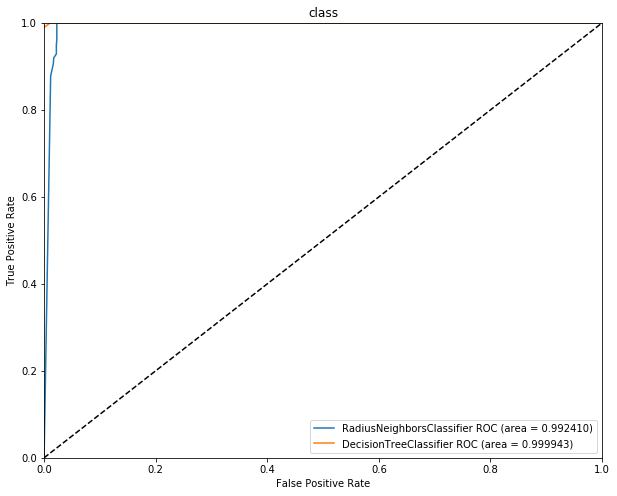

In [18]:

 # ROC график K соседей и решающего дерева

plt.figure(figsize=(10,8))
# K ближайщих соседей
mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc0 = mrnc.predict_proba(X_test, X_train, Y_train)
tpr, fpr, thresholds = roc_curve(Y_test, probas_mrnc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 
# Решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, Y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(Y_test, probas_dtc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   
# Вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

plt.figure(figsize=(10,8))
# K ближайщих соседей
mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, Y_train)
fpr, tpr, thresholds = roc_curve(Y_test, probas_mrnc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 
# Решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   
# Вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

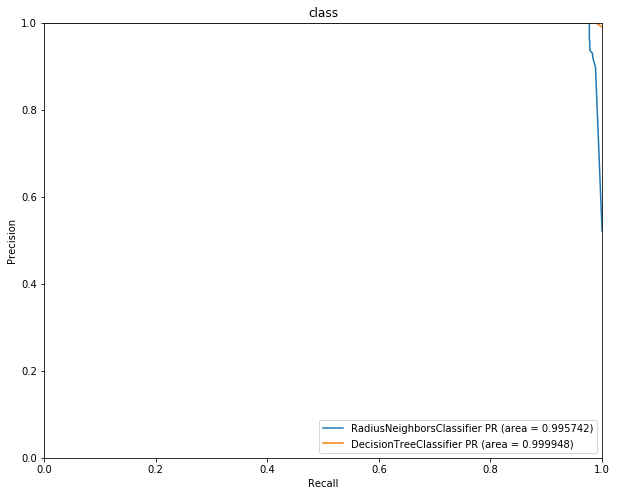

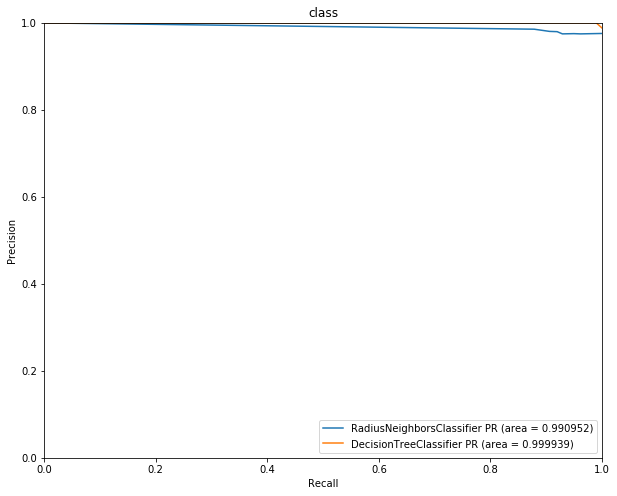

In [19]:
# PR график K соседей и решающего дерева

plt.figure(figsize=(10,8))
Y_test_invers = []
for i, y in enumerate(Y_test.reset_index(drop=True)):
    Y_test_invers.append(1-y)
# K ближайщих соседей
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_mrnc1[:,0])
aps_mrnc1 = average_precision_score(Y_test_invers,probas_mrnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# Решающее дерево
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(Y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# Вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

plt.figure(figsize=(10,8))
# K ближайщих соседей
precision, recall, thresholds = precision_recall_curve(Y_test, probas_mrnc1[:,1])
aps_mrnc1 = average_precision_score(Y_test,probas_mrnc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# Решающее дерево
precision, recall, thresholds = precision_recall_curve(Y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(Y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# Вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

### Вывод: 

Классификаторы дерево принятия решений и k ближайших соседей(кол-во ближ. объектов) имеют примерно одинаковые показатели качества относительно PR и ROC кривых. В целом, данные классификаторы правильно решают задачу предсказания класса с вероятностью 0.995~ 1.0, что очень точно.